
AND Operation:
Input1 Input2 Output
  0      0      0
  0      1      0
  1      0      0
  1      1      1
Weights: [  7.27970546   7.27970546 -11.00708887]


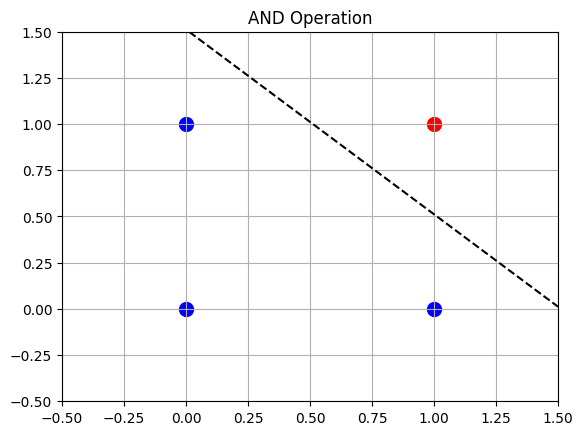


OR Operation:
Input1 Input2 Output
  0      0      0
  0      1      1
  1      0      1
  1      1      1
Weights: [ 7.9415838   7.9415835  -3.73475608]


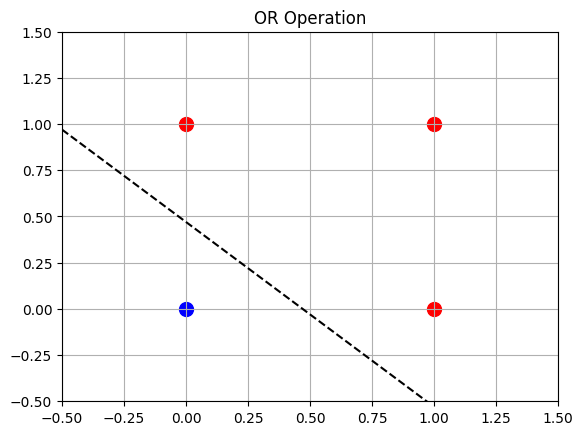


XOR Operation:
Input1 Input2 Output
  0      0      0
  0      1      0
  1      0      0
  1      1      0
Weights: [ 2.47840061e-16  2.48878161e-16 -3.32294622e-16]


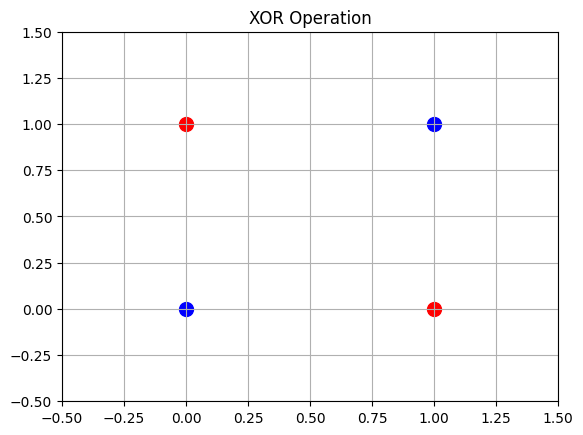

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simplified activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def predict(X, weights):
    return np.where(sigmoid(np.dot(X, weights)) > 0.5, 1, 0)

# Training function
def train(X, y, learning_rate=0.05, epochs=100000):
    weights = np.random.rand(X.shape[1]) * 0.1
    errors = []
    
    for epoch in range(epochs):
        # Forward pass
        output = sigmoid(np.dot(X, weights))
        error = y - output
        
        # Update weights
        weights += learning_rate * np.dot(X.T, error * output * (1 - output))
        
        # Track error
        if epoch % 1000 == 0:
            errors.append(np.mean(error**2))
    
    return weights, errors

# Data (with bias term)
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

# Target outputs
targets = {
    'AND': np.array([0, 0, 0, 1]),
    'OR':  np.array([0, 1, 1, 1]),
    'XOR': np.array([0, 1, 1, 0])
}

# Train and test each operation
for name, y in targets.items():
    print(f"\n{name} Operation:")
    w, errors = train(X, y)
    pred = predict(X, w)
    
    print("Input1 Input2 Output")
    for i in range(4):
        print(f"  {X[i,0]}      {X[i,1]}      {pred[i]}")
    
    print(f"Weights: {w}")
    
    # Plot decision boundary
    plt.figure()
    for i in range(4):
        plt.scatter(X[i,0], X[i,1], c='r' if y[i] else 'b', marker='o', s=100)
    
    # Create boundary line
    x_vals = np.array([-0.5, 1.5])
    if name != 'XOR':  # Only plot line for linearly separable cases
        y_vals = (-w[2] - w[0]*x_vals) / w[1]
        plt.plot(x_vals, y_vals, 'k--')
    
    plt.title(f"{name} Operation")
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid()
    plt.show()